In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.interpolate import make_interp_spline
from highlight_text import ax_text
import pandas as pd


plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

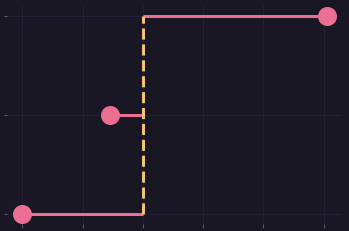

In [8]:

# plt.style.use("seaborn-dark")  # set style because it looks nice
plt.style.use("rose-pine-moon.mplstyle")

x=['Nuts & Seeds','Grains','Meat']



#LFV means legumes fruits and vegetables

y=[0.60,0.89,1.61]
y.sort()

fig, ax = plt.subplots()

# plt.stem(x, y, markerfmt = 'o', linefmt='-', basefmt = '-', orientation="horizontal", bottom=1)

(markers, stemlines, baseline) = plt.stem(x, y, markerfmt = 'o', linefmt='-', basefmt = '--', orientation="horizontal", bottom=1)
plt.setp(markers, marker='o', markersize=15, markeredgewidth=4)
plt.setp(stemlines, linestyle="-", linewidth=3)
plt.setp(baseline, linestyle="--", linewidth=3)

# plt.show()

# ax.set_title("Coronary Heart Disease Risk in Women by Protein Consumed")
ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
# ax.set_xticks([0.6,0.8,1.0,1.2,1.4])
# ax.set_xticklabels(x)
plt.show()


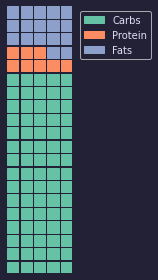

In [3]:
# useful libraries, including pyWaffle
import matplotlib.pyplot as plt
from pywaffle import Waffle

# create simple dummy data
data = {'Carbs': 75, 'Protein': 8, 'Fats': 17}

plt.style.use("rose-pine-moon.mplstyle")

# Basic waffle
plt.figure(
  FigureClass=Waffle,
  rows=20,
  columns=5,
  values=data,
  vertical=True,
  legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
)
plt.show()

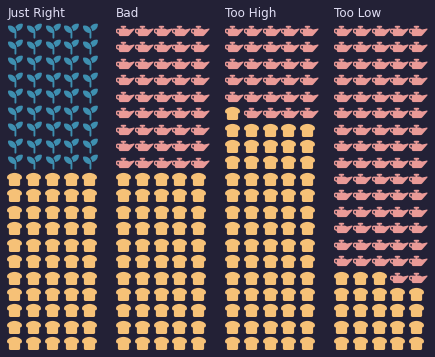

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # for the legend
from pywaffle import Waffle
import pandas as pd

plt.style.use("rose-pine-moon.mplstyle")

data = {
    'Just Right': [55, 45, 0],
    'Bad': [55, 0, 45],
    'Too High': [71, 0, 29],
    'Too Low': [23,0,77]
}

df = pd.DataFrame(data,
                  index=['Carbs', 'Veggies','Healthy Oil'])

number_of_bars = len(df.columns) # one bar per year
colors = ["#f6c177","#3e8fb0", "#ea9a97"]

# Init the whole figure and axes
fig, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df.columns[i]
    values = df[col_name]/1000 # values from the i-th column
    
    Waffle.make_waffle(
        ax=ax,  # pass axis to make_waffle 
        rows=20,
        columns=5,
        values=values,
        title={"label": col_name, "loc": "left"},
        colors=colors,
        vertical=True,
        icons=['bread-slice', 'seedling','oil-can'],
        font_size=15, # size of each point
        icon_legend=True,
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    )
    
# Add a title
# fig.suptitle('Vehicle Production by Year and Vehicle Type',
#              fontsize=14, fontweight='bold')


# Add a legend
legend_labels = df.index
legend_elements = [mpatches.Patch(color=colors[i],
                                  label=legend_labels[i]) for i in range(len(colors))]
# fig.legend(
#     handles=legend_elements,
#            loc="upper left",
#         #    title="Vehicle Types",
#            bbox_to_anchor=(0, 0),
#            framealpha=0,
#            fontsize=12,
#            ncol=3
#            )

plt.subplots_adjust(right=0.85)

ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  

ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
plt.show()

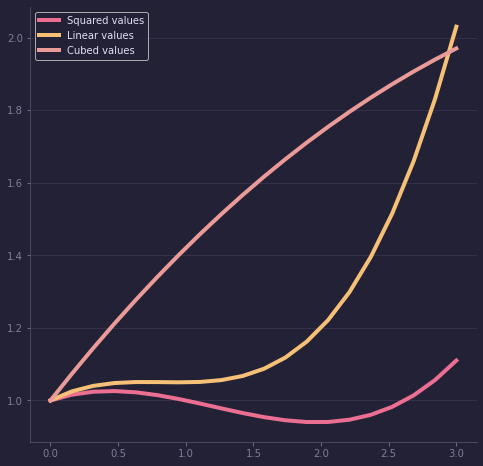

In [5]:
# Custom legend for right plot



# Sample data
x = np.array([0, 1, 2, 3])
y1 = np.array([1, 1.00, 0.94, 1.11])
y2 = np.array([1, 1.05, 1.2, 2.03])
y3 = np.array([1, 1.42, 1.74, 1.97])
colors = ["#1B9E77", "#D95F02", "#7570B3"]

plt.style.use("rose-pine-moon.mplstyle")

X_Y_Spline1 = make_interp_spline(x, y1)
X_Y_Spline2 = make_interp_spline(x, y2)
X_Y_Spline3 = make_interp_spline(x, y3)

 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 20)

Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)
Y_3 = X_Y_Spline3(X_)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot
ax.plot(X_, Y_1, label='Squared values',  linewidth=4)
ax.plot(X_, Y_2, label='Linear values',  linewidth=4)
ax.plot(X_, Y_3, label='Cubed values', linewidth=4)
ax.legend()

# ax.fill_between(X_, Y_1, Y_2)

ax.spines[["top", "right"]].set_visible(False)


# Custom legend
# ax_text(x=1, y=1, ax=ax, s="Bitcoin", fontsize=12, fontweight="bold", va="top", ha="left", rotation=65)
# ax_text(x=1, y=1, ax=ax, s="Ethereum", fontsize=12, fontweight="bold", va="top", ha="left",  rotation=3)
# ax_text(x=1, y=1, ax=ax, s="S&P 500", fontsize=12, fontweight="bold", va="top", ha="left",  rotation=18)

# Show the plot
plt.show()

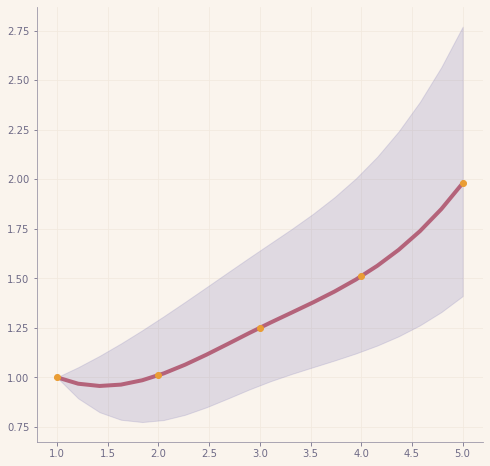

In [6]:
# Custom legend for right plot



# Sample data
x = np.array([1, 2, 3, 4, 5])
y1 = np.array([1, 1.29, 1.64, 2.03, 2.77])
y2 = np.array([1, 0.78, 0.96, 1.13, 1.41])
y3 = np.array([1, 1.01, 1.25, 1.51, 1.98])
colors = ["#1B9E77", "#D95F02", "#7570B3"]

plt.style.use("rose-pine-dawn.mplstyle")

X_Y_Spline1 = make_interp_spline(x, y1)
X_Y_Spline2 = make_interp_spline(x, y2)
X_Y_Spline3 = make_interp_spline(x, y3)

 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 20)

Y_1 = X_Y_Spline1(X_)
Y_2 = X_Y_Spline2(X_)
Y_3 = X_Y_Spline3(X_)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot
# ax.plot(X_, Y_1, label='Squared values',  linewidth=4)
# ax.plot(X_, Y_2, label='Linear values',  linewidth=4)

ax.fill_between(X_, Y_1, Y_2, alpha=0.2, color="#7570B3")

ax.plot(X_, Y_3, label='Cubed values', linewidth=4)
ax.plot(x,y3, linewidth=0, marker="o")
# ax.legend()

# ax.fill_between(X_, Y_1, Y_2)

ax.spines[["top", "right"]].set_visible(False)


# Custom legend
# ax_text(x=1, y=1, ax=ax, s="Bitcoin", fontsize=12, fontweight="bold", va="top", ha="left", rotation=65)
# ax_text(x=1, y=1, ax=ax, s="Ethereum", fontsize=12, fontweight="bold", va="top", ha="left",  rotation=3)
# ax_text(x=1, y=1, ax=ax, s="S&P 500", fontsize=12, fontweight="bold", va="top", ha="left",  rotation=18)

# ax.set_title("Coronary Heart Disease Risk in Women by Protein Consumed")
# ax.minorticks_off()

# ax.set_xticklabels([])
# ax.set_yticklabels([])

# ax.set_axis_off()
ax.grid(True)  
# Show the plot
plt.show()

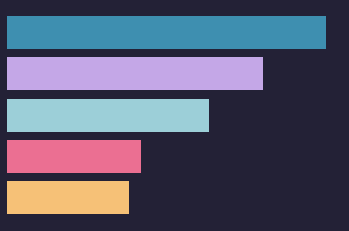

In [17]:
# libraries
# create dataset
height = [2.9, 4.8, 3.2, 6.1, 7.6]
bars = ('Vegan', 'Pesco-vegetarian', 'Lacto-ovo-vegetarian', 'Semi-vegetarian', 'Non-vegetarian')

df = pd.DataFrame({
    'Group': bars,
    'Value': height
})

plt.style.use("rose-pine-moon.mplstyle")

color = ['#f6c177', '#eb6f92', '#9ccfd8', '#c4a7e7', '#3e8fb0']

# Initialize a Figure and an Axes
fig, ax = plt.subplots()

df = df.sort_values(by=['Value'])

# Create horizontal bars
ax.barh(y=df.Group, width=df.Value, color=color)

ax.minorticks_off()

ax.set_xticklabels([])
ax.set_yticklabels([])

ax.set_axis_off()
ax.grid(True) 
# Show the plot
plt.show()